In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
import random
from copy import deepcopy
from math import log10, copysign
from sklearn.neighbors import KNeighborsClassifier as kNN

Zbiór uczący:


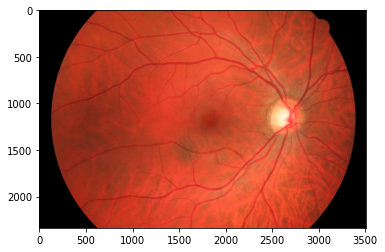

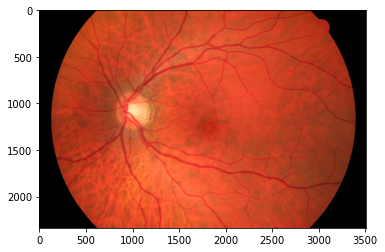

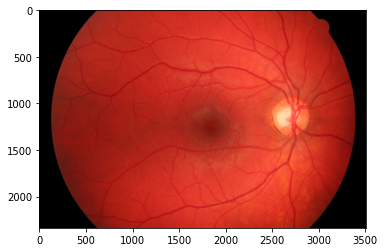

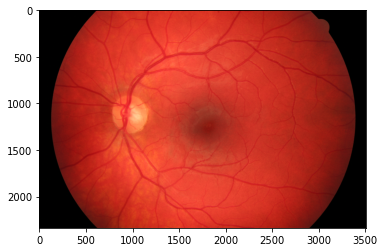

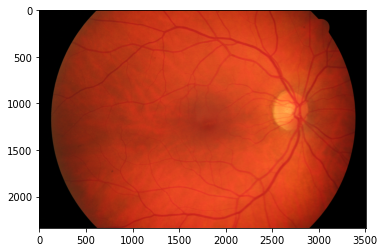

Obraz do predykcji:


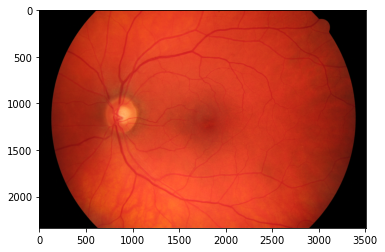

Wersja z wyznaczaniem kształtów:



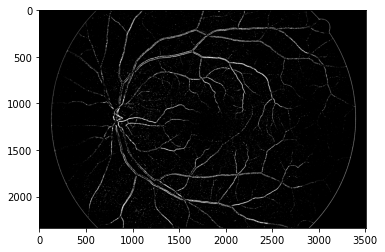

Macierz pomyłek:
	P		N
T	 182837 	 7429234
F	 50672 	 522601 

Przed uśrednianiem:
Accuracy: 92.99634810705574 %
Sensivity: 25.91822385525021 %
Specificity: 99.3225583316154 %

Po uśrednieniu:
0.626203910934328
Wersja uczenia maszynowego:



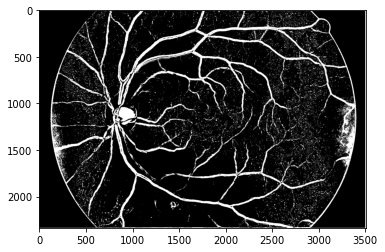

Macierz pomyłek:
	P		N
T	 451012 	 6858383
F	 621523 	 254426 

Przed uśrednianiem:
Accuracy: 89.29856827031338 %
Sensivity: 63.93361287597209 %
Specificity: 91.69076456308409 %

Po uśrednieniu:
0.7781218871952809


In [ ]:
neigh = kNN(n_neighbors=7)
print("Zbiór uczący:")
for i in range (1,6):
  if i<10:
    path="drive/MyDrive/oczka/0"+str(i)+"_h.jpg"
    path2="drive/MyDrive/reczne_oczka/0"+str(i)+"_h.tif"
  else:
    path="drive/MyDrive/oczka/"+str(i)+"_h.jpg"
    path2="drive/MyDrive/reczne_oczka/"+str(i)+"_h.tif"
  image = cv2.imread(path)
  result = cv2.imread(path2,0)
  original = cv2.imread(path,cv2.IMREAD_COLOR)
  originalRGB = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)
  plt.imshow(originalRGB)
  plt.show()

  black_pixels = np.where(
    (image[:, :, 0] <= 20) & 
    (image[:, :, 1] <= 20) & 
    (image[:, :, 2] <= 20)
  )

  image[:,:,2] = np.zeros([image.shape[0], image.shape[1]])
  image[:,:,0] = np.zeros([image.shape[0], image.shape[1]])
  image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  image[black_pixels] = 30

  huMomentsFinal = np.zeros((1000,448))
  answer_arr = np.zeros(1000)
  for j in range (0,500):
    x_rand = random.randint(0,image.shape[0]-1)
    y_rand = random.randint(0,image.shape[1]-1)
    while (result[x_rand,y_rand]!=0):
      x_rand = random.randint(0,image.shape[0]-1)
      y_rand = random.randint(0,image.shape[1]-1)
    help=image[x_rand-10:x_rand+11,y_rand-10:y_rand+11]
    for x, obj in enumerate(help):
      for y, elm in enumerate(obj):
        huMomentsFinal[j][x*21+y] = elm
    moments = cv2.moments(help)
    huMoments = cv2.HuMoments(moments)
    for k in range(0,7):
      if huMoments[k] != 0:
        huMomentsFinal[j][440+k] = -1* copysign(1.0,huMoments[k]) * log10(abs(huMoments[k]))
      else:
        huMomentsFinal[j][440+k] = 0
    answer_arr[j] = result[x_rand,y_rand]
  
  for j in range (500,1000):
    x_rand = random.randint(0,image.shape[0]-1)
    y_rand = random.randint(0,image.shape[1]-1)
    while (result[x_rand,y_rand]!=255):
      x_rand = random.randint(0,image.shape[0]-1)
      y_rand = random.randint(0,image.shape[1]-1)
    help=image[x_rand-10:x_rand+11,y_rand-10:y_rand+11]
    for x, obj in enumerate(help):
      for y, elm in enumerate(obj):
        huMomentsFinal[j][x*21+y] = elm
    moments = cv2.moments(help)
    huMoments = cv2.HuMoments(moments)
    for k in range(0,7):
      if huMoments[k] != 0:
        huMomentsFinal[j][440+k] = -1* copysign(1.0,huMoments[k]) * log10(abs(huMoments[k]))
      else:
        huMomentsFinal[j][440+k] = 0
    answer_arr[j] = result[x_rand,y_rand]
  
  neigh.fit(huMomentsFinal,answer_arr)

for i in range (10,11):
  print("Picture for prediction:")
  if i<10:
    path="drive/MyDrive/oczka/0"+str(i)+"_h.jpg"
    path2="drive/MyDrive/reczne_oczka/0"+str(i)+"_h.tif"
  else:
    path="drive/MyDrive/oczka/"+str(i)+"_h.jpg"
    path2="drive/MyDrive/reczne_oczka/"+str(i)+"_h.tif"
  image = cv2.imread(path)
  result = cv2.imread(path2,0)
  original = cv2.imread(path,cv2.IMREAD_COLOR)
  originalRGB = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)
  plt.imshow(originalRGB)
  plt.show()

  black_pixels = np.where(
    (image[:, :, 0] <= 20) & 
    (image[:, :, 1] <= 20) & 
    (image[:, :, 2] <= 20)
  )

  image[:,:,2] = np.zeros([image.shape[0], image.shape[1]])
  image[:,:,0] = np.zeros([image.shape[0], image.shape[1]])
  image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  image[black_pixels] = 30

  print("Shapes determining version:\n")
  binary = cv2.adaptiveThreshold(image,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,31,3)
  th = (binary <128)
  binary[th] = 255;
  binary[~th] = 0;
  plt.clf()
  plt.imshow(binary, cmap="gray")
  plt.show()
  
  TP = 0
  TN = 0
  FP = 0
  FN = 0
  for i in range(0,binary.shape[0]):
    for j in range(0,binary.shape[1]):
      if (binary[i][j]==result[i][j]) and (result[i][j]==255):
        TP+=1
      elif (binary[i][j]==result[i][j]) and (result[i][j]==0):
        TN+=1
      elif (binary[i][j]!=result[i][j]) and (result[i][j]==255):
        FN+=1
      elif (binary[i][j]!=result[i][j]) and (result[i][j]==0):
        FP+=1
      else:
        print("How did we get here? Result: ",result[i][j])
  print("Error matrix:")
  print("\tP\t\tN")
  print("T\t",TP,"\t",TN)
  print("F\t",FP,"\t",FN,"\n")
  print("Before averaging:")
  print("Accuracy:",((TN+TP)/(TN+TP+FP+FN))*100,"%")
  print("Sensivity:",(TP/(TP+FN))*100,"%")
  print("Specificity:",(TN/(TN+FP))*100,"%\n")
  print("After averaging:")
  print(((TP/(TP+FN))+(TN/(TN+FP)))/2)

  print("Machine learning version:\n")
  color = [0,0,0]
  top,bottom,left,right = [10]*4
  originalWithBorder = cv2.copyMakeBorder(image,top,bottom,left,right,cv2.BORDER_CONSTANT,value=color)

  prediction = np.zeros([originalRGB.shape[0],originalRGB.shape[1]])

  for j in range(10,originalWithBorder.shape[0]-10):
    for k in range(10,originalWithBorder.shape[1]-10):
      help=originalWithBorder[j-10:j+11,k-10:k+11]
      moments = cv2.moments(help)
      huMoments = cv2.HuMoments(moments)
      tab = np.zeros((1,448))
      for x, obj in enumerate(help):
        for y, elm in enumerate(obj):
          tab[0][x*21+y] = elm
      for x in range(0,7):
        if huMoments[x] != 0:
          tab[0][440+x] = -1* copysign(1.0,huMoments[x]) * log10(abs(huMoments[x]))
        else:
          tab[0][440+x] = 0
      prediction[j-10][k-10] = neigh.predict(tab)

  plt.clf()
  plt.imshow(prediction, cmap="gray")
  plt.show()
  
  TP = 0
  TN = 0
  FP = 0
  FN = 0
  for i in range(0,prediction.shape[0]):
    for j in range(0,prediction.shape[1]):
      if (prediction[i][j]==result[i][j]) and (result[i][j]==255):
        TP+=1
      elif (prediction[i][j]==result[i][j]) and (result[i][j]==0):
        TN+=1
      elif (prediction[i][j]!=result[i][j]) and (result[i][j]==255):
        FN+=1
      elif (prediction[i][j]!=result[i][j]) and (result[i][j]==0):
        FP+=1
      else:
        print("How did we get here? Result: ",result[i][j])
  print("Error matrix:")
  print("\tP\t\tN")
  print("T\t",TP,"\t",TN)
  print("F\t",FP,"\t",FN,"\n")
  print("Before averaging:")
  print("Accuracy:",((TN+TP)/(TN+TP+FP+FN))*100,"%")
  print("Sensivity:",(TP/(TP+FN))*100,"%")
  print("Specificity:",(TN/(TN+FP))*100,"%\n")
  print("After averaging:")
  print(((TP/(TP+FN))+(TN/(TN+FP)))/2)